## GRADED CHALLENGE 3

#### LIA RAININGSIH

Dataset unduh disini https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv

In [1]:
# import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import beta as beta_fun

%matplotlib inline

In [2]:
# import data ks-project-201801.csv
df2018 = pd.read_csv("ks-projects-201801.csv", parse_dates=['deadline', 'launched'], error_bad_lines=False)

#print shape dataframe 2018
print(df2018.shape)

#show data frame 2018 first 5 rows
df2018.head(5)

(378661, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
#check missing value
missing_values_sum = df2018.isna().sum()
print(missing_values_sum)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


In [4]:
df2018.fillna(0)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [5]:
#check column name's
df2018.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

<AxesSubplot:>

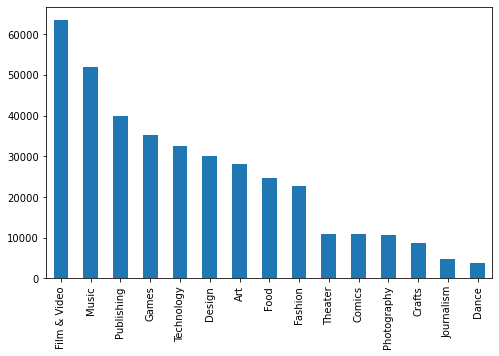

In [6]:
main_category = df2018['main_category'].value_counts()
main_category.plot.bar(main_category, figsize=(8,5))

#### Currency

<AxesSubplot:>

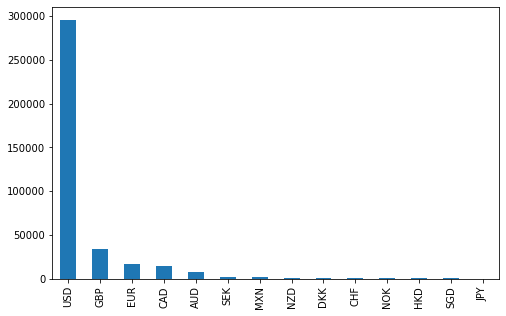

In [7]:
currency = df2018['currency'].value_counts()
currency.plot.bar(currency, figsize=(8,5))

In [8]:
# filter usd_pledgedl >= 10,000
df_filt = df2018[df2018['usd pledged'] >=50000]
df_filt

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
46,1000183112,Hot Chicken Takes Over.,Restaurants,Food,USD,2014-10-16,40000.0,2014-09-16 02:31:08,63401.00,successful,855,US,63401.00,63401.00,40000.00
50,1000201265,I'LL SEE YOU IN MY DREAMS - narrative feature ...,Narrative Film,Film & Video,USD,2014-02-05,60000.0,2014-01-11 00:57:14,61365.16,successful,632,US,61365.16,61365.16,60000.00
63,1000235643,HIIT Bottle™,Drinks,Food,USD,2015-04-27,15000.0,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378255,998108744,Nubé the Perfected Hammock Shelter by Sierra M...,Product Design,Design,USD,2013-09-11,30000.0,2013-08-07 07:00:08,167226.00,successful,569,US,167226.00,167226.00,30000.00
378285,99825633,Battle Systems™ Fantasy Dungeon Terrain,Tabletop Games,Games,GBP,2014-09-21,21000.0,2014-08-22 21:00:15,198415.01,successful,1204,GB,328968.44,323583.63,34247.69
378388,998654567,"REFOUNDRY: Restoring Furniture, Restoring Lives",Woodworking,Crafts,USD,2015-11-15,45000.0,2015-09-16 16:02:51,50182.50,successful,636,US,50182.50,50182.50,45000.00
378437,998899601,Eminent Domain: Battlecruisers & Exotica,Tabletop Games,Games,USD,2015-07-01,30000.0,2015-06-04 17:42:58,110319.00,successful,2314,US,110319.00,110319.00,30000.00


In [12]:
#group by category
df_filt.groupby('main_category').count()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,,,
Art,136,136,136,136,136,136,136,136,136,136,136,136,136,136
Comics,182,182,182,182,182,182,182,182,182,182,182,182,182,182
Crafts,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Dance,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Design,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722
Fashion,340,340,340,340,340,340,340,340,340,340,340,340,340,340
Film & Video,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172,1172
Food,223,223,223,223,223,223,223,223,223,223,223,223,223,223
Games,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746,1746


In [17]:
#dataframe group by category, CDF<=95% 
df_main_category = df_filt.groupby('main_category').count().reset_index()[['main_category','category']].sort_values('category',ascending=False)
df_main_category['main_category_count']=df_main_category['category'].cumsum()
df_main_category['pcg_csum']=df_main_category['main_category_count']/df_main_category['main_category_count'].max()
df_main_category = df_main_category[df_main_category['pcg_csum']<=0.95]

df_main_category

,main_category,category,main_category_count,pcg_csum
13,Technology,1891,1891,0.233977
8,Games,1746,3637,0.450012
4,Design,1722,5359,0.663078
6,Film & Video,1172,6531,0.808092
5,Fashion,340,6871,0.850161
10,Music,245,7116,0.880475
12,Publishing,228,7344,0.908686
7,Food,223,7567,0.936278


In [18]:
#df_grp_category
print(df_main_category.shape)

(8, 4)


In [26]:
df_filt = df_filt[df_filt['main_category'].isin(df_main_category['main_category'])]

In [20]:
print(df_filt.shape)

(8082, 15)


## Measure of Central Tendency and Variance

In [21]:
df_filt.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,8.082000e+03,8.082000e+03,8.082000e+03,8082.000000,8.082000e+03,8.082000e+03,8.082000e+03
mean,1.070261e+09,8.334644e+04,2.249131e+05,2165.455333,1.898368e+05,2.216442e+05,8.358507e+04
std,6.161789e+08,3.752182e+05,5.722926e+05,5374.306335,5.007991e+05,5.662776e+05,4.499366e+05
min,5.083100e+04,1.000000e+00,2.975700e+04,8.000000,5.000000e+04,4.673501e+04,1.000000e+00
25%,5.294346e+08,2.000000e+04,6.239605e+04,488.000000,6.226950e+04,6.371825e+04,2.051712e+04
50%,1.066302e+09,5.000000e+04,9.509788e+04,1017.000000,8.920018e+04,9.678611e+04,5.000000e+04
75%,1.608164e+09,7.500000e+04,1.816385e+05,2051.000000,1.567437e+05,1.830386e+05,7.500000e+04
max,2.147476e+09,2.000000e+07,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,3.048873e+07


In [22]:
print(df_filt['usd pledged'].describe())
df_filt['usd pledged'].describe()['mean']

count    8.082000e+03
mean     1.898368e+05
std      5.007991e+05
min      5.000000e+04
25%      6.226950e+04
50%      8.920018e+04
75%      1.567437e+05
max      2.033899e+07
Name: usd pledged, dtype: float64


189836.84867606958

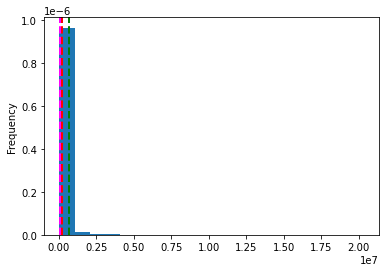

In [43]:
df_filt['usd pledged'].plot.hist(bins=20,density=True)
plt.axvline(df_filt['usd pledged'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['usd pledged'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['usd pledged'].describe()['mean']+df_filt['usd pledged'].describe()['std']
            , color='green', linestyle='dashed', linewidth=2)

### Distribution Fit

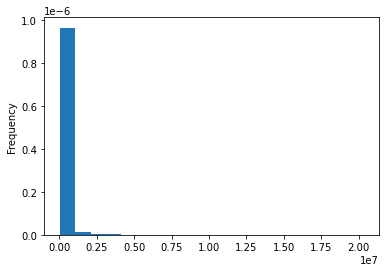

In [49]:
fig, ax = plt.subplots(1, 1)
df_filt['usd pledged'].plot.hist(bins=20,density=True)

alpha = 2.3
beta = 14
x = np.linspace(0,1, 1)
plt.plot(10*x, beta_fun.pdf(x,alpha,beta)/10,'m-', lw=1.5, alpha=1, label='norm pdf')

x = np.linspace(0,100, 1)
plt.plot(x, norm.pdf(x,df_filt['usd pledged'].describe()['mean'],df_filt['usd pledged'].describe()['std']-2000)
         ,'r-', lw=1.5, alpha=1, label='expon pdf')

In [74]:
Exp_value = alpha/(alpha+beta)*100000
print(Exp_value)

14110.429447852759


## Chi Square Test

##### Relation between categories

In [60]:
df_pivot=df_filt.groupby(['currency','main_category']).count()[['category','usd pledged']].reset_index()
df_pivot = df_pivot.pivot(index="currency",columns="main_category", values='category').fillna(0)

In [61]:
df_pivot

main_category,Design,Fashion,Film & Video,Food,Games,Music,Publishing,Technology
currency,,,,,,,,
AUD,39.0,5.0,5.0,0.0,15.0,1.0,2.0,37.0
CAD,69.0,14.0,19.0,1.0,53.0,2.0,8.0,55.0
CHF,15.0,1.0,0.0,1.0,2.0,0.0,0.0,6.0
DKK,7.0,2.0,0.0,0.0,0.0,1.0,0.0,6.0
EUR,63.0,11.0,14.0,4.0,50.0,1.0,1.0,121.0
GBP,119.0,19.0,60.0,16.0,158.0,23.0,19.0,159.0
HKD,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NOK,1.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
NZD,7.0,0.0,0.0,1.0,7.0,0.0,0.0,3.0


In [62]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 259.86
p-value: 0.0000


##### P-Value < 0.05 H0 ditolak. Currency tidak mempengaruhi jumlah pembelian.

In [68]:
cols = [['currency','main_category'],['currency','main_category'],['currency','name']]
p_vals=[]

for col in cols:
    df_pivot=df_filt.groupby(col).count()[['category','usd pledged']].reset_index()
    df_pivot = df_pivot.pivot(index=col[0],columns=col[1], values='category').fillna(0)
    chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
    p_vals.append(pvalue)

In [69]:
p_vals

[1.1371785140795036e-21, 1.1371785140795036e-21, 0.47784758203027794]

#### Correlation

In [70]:
df_filt.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,-0.008220,0.000162,0.006872,0.000144,-0.000047,-0.009174
goal,-0.008220,1.000000,0.107244,0.095124,0.104881,0.094835,0.958416
pledged,0.000162,0.107244,1.000000,0.703666,0.899764,0.980207,0.077115
backers,0.006872,0.095124,0.703666,1.000000,0.709033,0.719689,0.082470
usd pledged,0.000144,0.104881,0.899764,0.709033,1.000000,0.918742,0.091801
usd_pledged_real,-0.000047,0.094835,0.980207,0.719689,0.918742,1.000000,0.082404
usd_goal_real,-0.009174,0.958416,0.077115,0.082470,0.091801,0.082404,1.000000


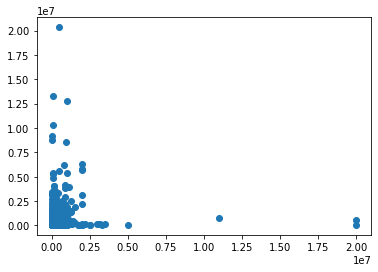

In [71]:
plt.scatter(df_filt['goal'],df_filt['usd pledged'])

### Two Sample Test

In [75]:
df_filt

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
46,1000183112,Hot Chicken Takes Over.,Restaurants,Food,USD,2014-10-16,40000.0,2014-09-16 02:31:08,63401.00,successful,855,US,63401.00,63401.00,40000.00
50,1000201265,I'LL SEE YOU IN MY DREAMS - narrative feature ...,Narrative Film,Film & Video,USD,2014-02-05,60000.0,2014-01-11 00:57:14,61365.16,successful,632,US,61365.16,61365.16,60000.00
63,1000235643,HIIT Bottle™,Drinks,Food,USD,2015-04-27,15000.0,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378249,998064752,The LUCY Drawing Tool: Most Versatile Camera L...,Product Design,Design,USD,2016-04-07,12000.0,2016-03-01 13:05:11,88771.00,successful,795,US,88771.00,88771.00,12000.00
378255,998108744,Nubé the Perfected Hammock Shelter by Sierra M...,Product Design,Design,USD,2013-09-11,30000.0,2013-08-07 07:00:08,167226.00,successful,569,US,167226.00,167226.00,30000.00
378285,99825633,Battle Systems™ Fantasy Dungeon Terrain,Tabletop Games,Games,GBP,2014-09-21,21000.0,2014-08-22 21:00:15,198415.01,successful,1204,GB,328968.44,323583.63,34247.69
378437,998899601,Eminent Domain: Battlecruisers & Exotica,Tabletop Games,Games,USD,2015-07-01,30000.0,2015-06-04 17:42:58,110319.00,successful,2314,US,110319.00,110319.00,30000.00


In [76]:
df_make_smy=df_filt.groupby('currency').agg({'usd pledged':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [77]:
df_make_smy.sort_values('count',ascending=False).head(5)

,,count,mean
11,USD,6304,202822.062768
5,GBP,573,164124.135881
4,EUR,265,164816.246302
1,CAD,221,161280.200362
0,AUD,104,139901.712019


In [83]:
df_hd = df_filt[df_filt['currency']=='EUR']
df_te = df_filt[df_filt['currency']=='CAD']

<AxesSubplot:xlabel='usd pledged', ylabel='Density'>

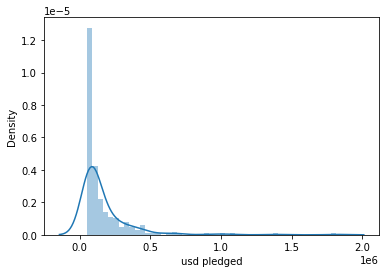

In [84]:
sns.distplot(df_hd['usd pledged'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='usd pledged', ylabel='Density'>

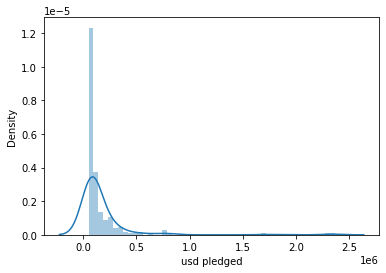

In [85]:
sns.distplot(df_te['usd pledged'])

EURO sample mean:164816.24630188674
EURO sample std:197968.8642486743
EURO Kurtosis:25.69488578312432
CAD sample mean:161280.20036199092
CAD Games sample std:267894.535877962
CAD Games Kurtosis:43.24645396272188
t-statistic:-0.1626507058555043
p-value:0.435438


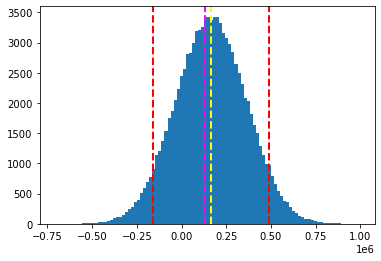

In [86]:
np.random.seed(123)
nonMath =df_hd['usd pledged']
math = df_te['usd pledged']
print("EURO sample mean:" + str(nonMath.mean()))
print("EURO sample std:" + str(nonMath.std()))
print("EURO Kurtosis:" + str(nonMath.kurtosis()))
print("CAD sample mean:" + str(math.mean()))
print("CAD Games sample std:" + str(math.std()))
print("CAD Games Kurtosis:" + str(math.kurtosis()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

### Kesimpulan

Nilai p-value > 0.05 berarti nilai H0 diterima dan H1 ditolak.
